In [1]:
from mxnet import ndarray as nd
from mxnet import autograd
from mxnet import gluon

num_train = 20
num_test = 100
num_inputs = 200

true_w = nd.ones((num_inputs, 1)) * 0.01
true_b = 0.05

X = nd.random.normal(shape=(num_train + num_test, num_inputs))
y = nd.dot(X, true_w)
y += .01 * nd.random.normal(shape=y.shape)

X_train, X_test = X[:num_train, :], X[num_train:, :]
y_train, y_test = y[:num_train], y[num_train:]

In [2]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 120
import matplotlib.pyplot as plt

batch_size = 1
dataset_train = gluon.data.ArrayDataset(X_train, y_train)
data_iter_train = gluon.data.DataLoader(dataset_train, batch_size, shuffle=True)

square_loss = gluon.loss.L2Loss()

def test(net, X, y):
    return square_loss(net(X), y).mean().asscalar()

def train(weight_decay):
    learning_rate = 0.005
    epochs = 10

    net = gluon.nn.Sequential()
    with net.name_scope():
        net.add(gluon.nn.Dense(1))
    net.initialize()

    # 注意到这里 'wd'
    trainer = gluon.Trainer(net.collect_params(), 'sgd', {
        'learning_rate': learning_rate, 'wd': weight_decay})

    train_loss = []
    test_loss = []
    for e in range(epochs):
        for data, label in data_iter_train:
            with autograd.record():
                output = net(data)
                loss = square_loss(output, label)
            loss.backward()
            trainer.step(batch_size)
        train_loss.append(test(net, X_train, y_train))
        test_loss.append(test(net, X_test, y_test))
    plt.plot(train_loss)
    plt.plot(test_loss)
    plt.legend(['train','test'])
    plt.show()

    return ('learned w[:10]:', net[0].weight.data()[:,:10],
            'learned b:', net[0].bias.data())

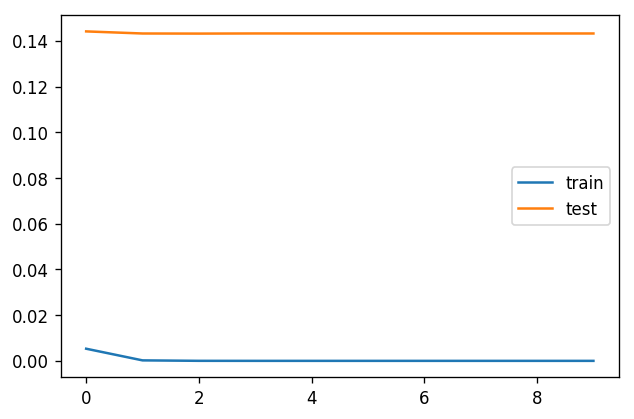

('learned w[:10]:', 
 [[ 0.02173468  0.0380385   0.02015135  0.0349548   0.02087412  0.03518512
   -0.01959787 -0.00567005  0.0198723  -0.04779412]]
 <NDArray 1x10 @cpu(0)>, 'learned b:', 
 [ 0.00383552]
 <NDArray 1 @cpu(0)>)

In [3]:
train(0)

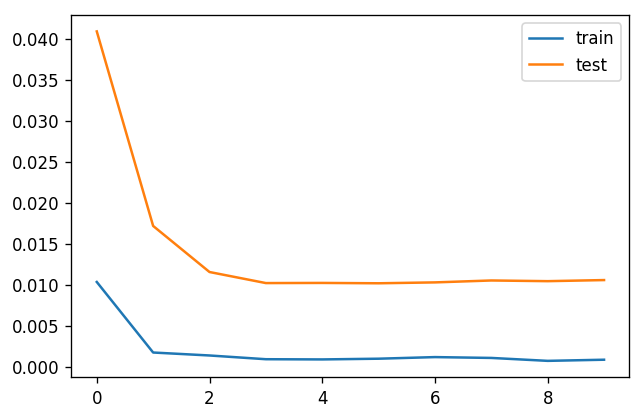

('learned w[:10]:', 
 [[-0.00277108  0.00234281 -0.00182076  0.00311625 -0.00216963 -0.00309116
    0.00214532  0.00104584  0.00240742  0.00090348]]
 <NDArray 1x10 @cpu(0)>, 'learned b:', 
 [-0.00100959]
 <NDArray 1 @cpu(0)>)

In [4]:
train(6)